In [30]:
import sys
import platform
import numpy as np
import scipy as sp
import matplotlib as mplt
from scipy.interpolate import spline,interp1d
from scipy import signal
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()  # plot styling

In [42]:
print(sys.version)
print("Processor: {}".format(platform.processor()))
print("Numpy version: {}".format(np.__version__))
print("Scipy version: {}".format(sp.__version__))
print("Matplotlib version: {}".format(mplt.__version__))

3.5.1 |Anaconda custom (64-bit)| (default, Dec  7 2015, 11:16:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Processor: x86_64
Numpy version: 1.11.0
Scipy version: 0.17.1
Matplotlib version: 1.5.1


In [4]:
def plot(data_1, data_2, data_3, data_4, dt = 50, xlabel='time $[ns]$', ylabel='label', fontsize=30, x_max = 100, output='annealing.pdf'):
    """
    plot data.
    data_1, data_2, data_3, data_4:
                            2D np.array
                            first column: time [ns]
                            second column: data
                            the size of the arrau are supposed to be equal
    dt: integer
        number of values that are skipped
    xlabel : string
    ylabel : string
    fontsize: integer
    x_max = integer
            x limit for plotting
    output: string (pdf, jpg, ...)
            name of the output file to save the plot
    """
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1, 1, 1)
    
    # DATA
    ax.plot(data_1[::dt,0], data_1[::dt,1], '-', linewidth=3.0, label='1')
    ax.plot(data_2[::dt,0], data_2[::dt,1], '-', linewidth=3.0, label='2') # '--'
    ax.plot(data_3[::dt,0], data_3[::dt,1], '-', linewidth=3.0, label='3') # '-.'
    ax.plot(data_4[::dt,0], data_4[::dt,1], 'k-', linewidth=3.0, label='4') # 'k:'
    
    # Legend
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.legend(['water', '[EMIM][ALA]', '[EMIM][MET]', '[EMIM][TRP]'], fontsize=fontsize-5, loc='best')
    
    # police
    ax.tick_params(labelsize=fontsize)
    ax.set_xlim([0.0, x_max])
    # Add and specify different settings for minor grids
    ax.set_xticks(np.arange(0.0, x_max+1, 10.0), minor = True)
    ax.grid(which = 'minor', alpha = 0.9)
    # Specify different settings for major and minor grids
    ax.grid(which = 'minor', alpha = 0.7)

    plt.tight_layout()
    fig.savefig(output)

In [25]:
def plot_smooth(data_1, data_2=None, data_3=None, data_4=None, dt = 50, xlabel='time $[ns]$', ylabel='label', fontsize=30, x_max = 100, output='annealing.pdf'):
    """
    plot_smooth interpolate the data to plot smooth data.
    data_1, data_2, data_3, data_4:
                            2D np.array
                            first column: time [ns]
                            second column: data
                            the size of the arrau are supposed to be equal
    dt: integer
        number of values that are skipped
    xlabel : string
    ylabel : string
    fontsize: integer
    x_max = integer
            x limit for plotting
    output: string (pdf, jpg, ...)
            name of the output file to save the plot
    """
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1, 1, 1)
    f_1 = interp1d(data_1[::dt,0], data_1[::dt,1], kind='cubic')
    f_2 = interp1d(data_2[::dt,0], data_2[::dt,1], kind='cubic')
    f_3 = interp1d(data_3[::dt,0], data_3[::dt,1], kind='cubic')
    f_4 = interp1d(data_4[::dt,0], data_4[::dt,1], kind='cubic')
    
    # DATA
    ax.plot(data_1[::,0], f_1(data_1[::,0]), '-', linewidth=3.0, label='1')
    ax.plot(data_2[::,0], f_2(data_2[::,0]), '-', linewidth=3.0, label='2')
    ax.plot(data_3[::,0], f_3(data_3[::,0]), '-', linewidth=3.0, label='3')
    ax.plot(data_4[::,0], f_4(data_4[::,0]), 'k-', linewidth=3.0, label='4')
    
    # Legend
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.legend(['water', '[EMIM][ALA]', '[EMIM][MET]', '[EMIM][TRP]'], fontsize=fontsize-5, loc='best')
    
    # police
    ax.tick_params(labelsize=fontsize)
    ax.set_xlim([0.0, x_max])
    # Add and specify different settings for minor grids
    ax.set_xticks(np.arange(0.0, x_max+1, 10.0), minor = True)
    ax.grid(which = 'minor', alpha = 0.9)
    # Specify different settings for major and minor grids
    ax.grid(which = 'minor', alpha = 0.7)

    plt.tight_layout()
    fig.savefig(output)

In [74]:
# Defining a gaussian window
n = 31
window = signal.gaussian(n, std=6)
len(window)

31

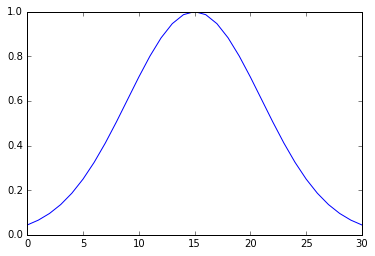

In [75]:
plt.plot(np.arange(n),window)

In [51]:
sum(window)

16.261736991556646

In [180]:
dt = 100
len(r_gyration_water[2*dt::dt])
#r_gyration_water[::dt,1]

99

In [179]:
filtered = signal.convolve(r_gyration_water[::dt,1], window, mode = 'same') / sum(window)
len(filtered[2::])

99

In [76]:
def plot_convolve(data_1, data_2=None, data_3=None, data_4=None, window = signal.gaussian(31, std=6), dt = 50, xlabel='time $[ns]$', ylabel='label', fontsize=30, x_max = 100, output='annealing.pdf'):
    """
    plot_convolve convolves the data with a gaussian (default).
    data_1, data_2, data_3, data_4:
                            2D np.array
                            first column: time [ns]
                            second column: data
                            the size of the arrau are supposed to be equal
    window: np.array
            window used to convolve the plot
            default window is a gaussian window (signal.gaussian(21, std=6))
    dt: integer
        number of values that are skipped
    xlabel : string
    ylabel : string
    fontsize: integer
    x_max = integer
            x limit for plotting
    output: string (pdf, jpg, ...)
            name of the output file to save the plot
    """
    # skip the data at the beginning and at the end because the convolution is not effective 
    # for half the windows size at the beginning and at the end
    skip = len(window) // 2
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1, 1, 1)
    filtered_1 = signal.convolve(data_1[::dt,1], window, mode='same') / sum(window)
    filtered_2 = signal.convolve(data_2[::dt,1], window, mode='same') / sum(window)
    filtered_3 = signal.convolve(data_3[::dt,1], window, mode='same') / sum(window)
    filtered_4 = signal.convolve(data_4[::dt,1], window, mode='same') / sum(window)
    
    
    # DATA
    ax.plot(data_1[skip*dt:-skip*dt:dt,0], filtered_1[skip:-skip], '-', linewidth=3.0, label='1')
    ax.plot(data_2[skip*dt:-skip*dt:dt,0], filtered_2[skip:-skip], '-', linewidth=3.0, label='2')
    ax.plot(data_3[skip*dt:-skip*dt:dt,0], filtered_3[skip:-skip], '-', linewidth=3.0, label='3')
    ax.plot(data_4[skip*dt:-skip*dt:dt,0], filtered_4[skip:-skip], 'k-', linewidth=3.0, label='4')


    # Legend
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.legend(['water', '[EMIM][ALA]', '[EMIM][MET]', '[EMIM][TRP]'], fontsize=fontsize-5, loc='best')
    
    # police
    ax.tick_params(labelsize=fontsize)
    ax.set_xlim([0.0, x_max])
    # Add and specify different settings for minor grids
    ax.set_xticks(np.arange(0.0, x_max+1, 10.0), minor = True)
    ax.grid(which = 'minor', alpha = 0.9)
    # Specify different settings for major and minor grids
    ax.grid(which = 'minor', alpha = 0.7)

    plt.tight_layout()
    fig.savefig(output)

# Water

Results on Abacus

In [11]:
%cd /home/chevrot/Simulations/AAILs/TRP_cage/Water/From_PDB/8_md_2_baths_390K/Analyses
#%cd /Users/guillaume/Simulations/AAILs/TRP_cage/Water/From_PDB/8_md_2_baths_390K/Analyses

/home/chevrot/Simulations/AAILs/TRP_cage/Water/From_PDB/8_md_2_baths_390K/Analyses


In [12]:
temperature_water = np.loadtxt('temp.dat')
r_gyration_water = np.loadtxt('gyrate.dat')
rmsd_water = np.loadtxt('rmsd.dat')
secondary_structure_water = np.loadtxt('scount.dat')
hbonds_prot_prot_water = np.loadtxt('hbnum_prot_prot.dat')
hbonds_prot_solv_water = np.loadtxt('hbnum_prot_solv.dat')
surface_water = np.loadtxt('area.dat')

In [13]:
# Convert time from ps to ns
temperature_water[:,0] = temperature_water[:,0]/1000
r_gyration_water[:,0] = r_gyration_water[:,0]/1000
rmsd_water[:,0] = rmsd_water[:,0]/1000
secondary_structure_water[:,0] = secondary_structure_water[:,0]/1000
hbonds_prot_prot_water[:,0] = hbonds_prot_prot_water[:,0]/1000
hbonds_prot_solv_water[:,0] = hbonds_prot_solv_water[:,0]/1000
surface_water[:,0] = surface_water[:,0]/1000

# Ala

Results on Abacus

In [14]:
%cd /home/chevrot/Simulations/AAILs/TRP_cage/Emim_ala/From_PDB/5%_il/8_md_2_baths_420K/Analyses/

/home/chevrot/Simulations/AAILs/TRP_cage/Emim_ala/From_PDB/5%_il/8_md_2_baths_420K/Analyses


In [15]:
temperature_ala = np.loadtxt('temp.dat')
r_gyration_ala = np.loadtxt('gyrate.dat')
rmsd_ala = np.loadtxt('rmsd.dat')
secondary_structure_ala = np.loadtxt('scount.dat')
hbonds_prot_prot_ala = np.loadtxt('hbnum_prot_prot.dat')
hbonds_prot_solv_ala = np.loadtxt('hbnum_prot_solv.dat')
surface_ala = np.loadtxt('area.dat')

In [16]:
# Convert time from ps to ns
temperature_ala[:,0] = temperature_ala[:,0]/1000
r_gyration_ala[:,0] = r_gyration_ala[:,0]/1000
rmsd_ala[:,0] = rmsd_ala[:,0]/1000
secondary_structure_ala[:,0] = secondary_structure_ala[:,0]/1000
hbonds_prot_prot_ala[:,0] = hbonds_prot_prot_ala[:,0]/1000
hbonds_prot_solv_ala[:,0] = hbonds_prot_solv_ala[:,0]/1000
surface_ala[:,0] = surface_ala[:,0]/1000

# Met

Results on Abacus

In [17]:
%cd /home/chevrot/Simulations/AAILs/TRP_cage/Emim_met/5%_il/8_md_2_baths_430K/Analyses/

/home/chevrot/Simulations/AAILs/TRP_cage/Emim_met/5%_il/8_md_2_baths_430K/Analyses


In [18]:
temperature_met = np.loadtxt('temp.dat')
r_gyration_met = np.loadtxt('gyrate.dat')
rmsd_met = np.loadtxt('rmsd.dat')
secondary_structure_met = np.loadtxt('scount.dat')
hbonds_prot_prot_met = np.loadtxt('hbnum_prot_prot.dat')
hbonds_prot_solv_met = np.loadtxt('hbnum_prot_solv.dat')
surface_met = np.loadtxt('area.dat')

In [19]:
# Convert time from ps to ns
temperature_met[:,0] = temperature_met[:,0]/1000
r_gyration_met[:,0] = r_gyration_met[:,0]/1000
rmsd_met[:,0] = rmsd_met[:,0]/1000
secondary_structure_met[:,0] = secondary_structure_met[:,0]/1000
hbonds_prot_prot_met[:,0] = hbonds_prot_prot_met[:,0]/1000
hbonds_prot_solv_met[:,0] = hbonds_prot_solv_met[:,0]/1000
surface_met[:,0] = surface_met[:,0]/1000

# Trp

Results on Abacus

In [20]:
%cd /home/chevrot/Simulations/AAILs/TRP_cage/Emim_trp/5%_il/8_md_2_baths_430K/Analyses/

/home/chevrot/Simulations/AAILs/TRP_cage/Emim_trp/5%_il/8_md_2_baths_430K/Analyses


In [21]:
temperature_trp = np.loadtxt('temp.dat')
r_gyration_trp = np.loadtxt('gyrate.dat')
rmsd_trp = np.loadtxt('rmsd.dat')
secondary_structure_trp = np.loadtxt('scount.dat')
hbonds_prot_prot_trp = np.loadtxt('hbnum_prot_prot.dat')
hbonds_prot_solv_trp = np.loadtxt('hbnum_prot_solv.dat')
surface_trp = np.loadtxt('area.dat')

In [22]:
# Convert time from ps to ns
temperature_trp[:,0] = temperature_trp[:,0]/1000
r_gyration_trp[:,0] = r_gyration_trp[:,0]/1000
rmsd_trp[:,0] = rmsd_trp[:,0]/1000
secondary_structure_trp[:,0] = secondary_structure_trp[:,0]/1000
hbonds_prot_prot_trp[:,0] = hbonds_prot_prot_trp[:,0]/1000
hbonds_prot_solv_trp[:,0] = hbonds_prot_solv_trp[:,0]/1000
surface_trp[:,0] = surface_trp[:,0]/1000

# Radius of gyration

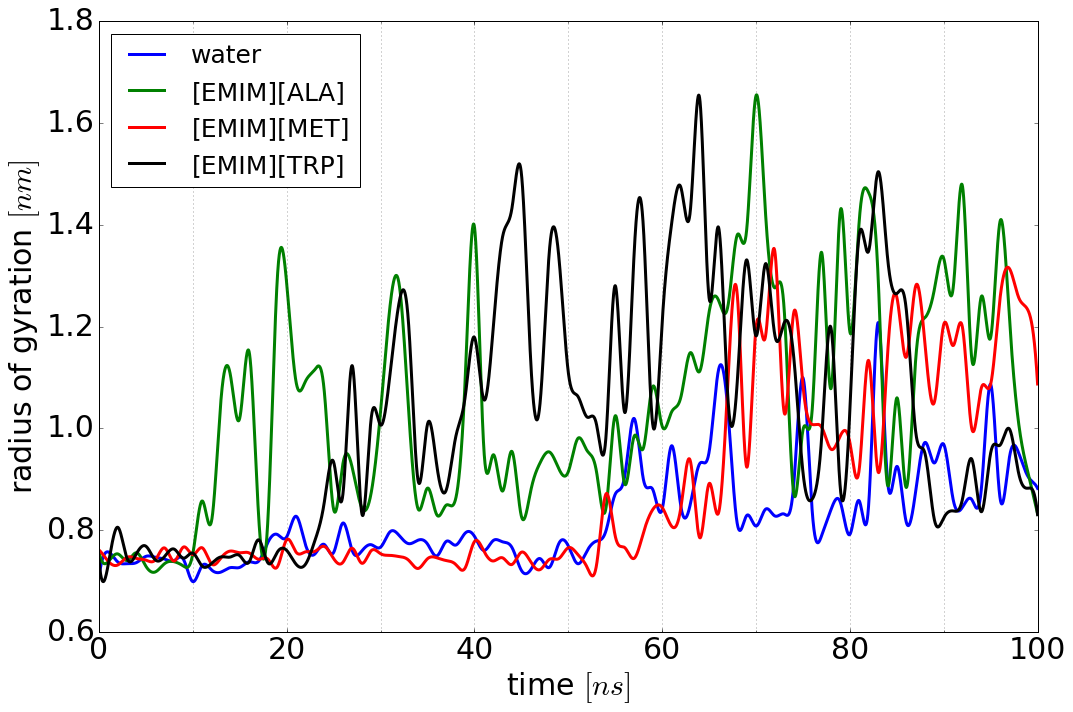

In [34]:
#plot(r_gyration_water, r_gyration_ala, r_gyration_met, r_gyration_trp, dt=100, ylabel = 'radius of gyration $[nm]$', output='/home/chevrot/AAIL_analyses/r_gyration.pdf')
plot_smooth(r_gyration_water, r_gyration_ala, r_gyration_met, r_gyration_trp, dt=100, ylabel = 'radius of gyration $[nm]$', output='/home/chevrot/r_gyration.pdf')
#plot_smooth(r_gyration_water, dt=100, ylabel = 'radius of gyration $[nm]$', output='/Users/guillaume/IPy_notebooks/AAILs/Annealing/r_gyration.pdf')

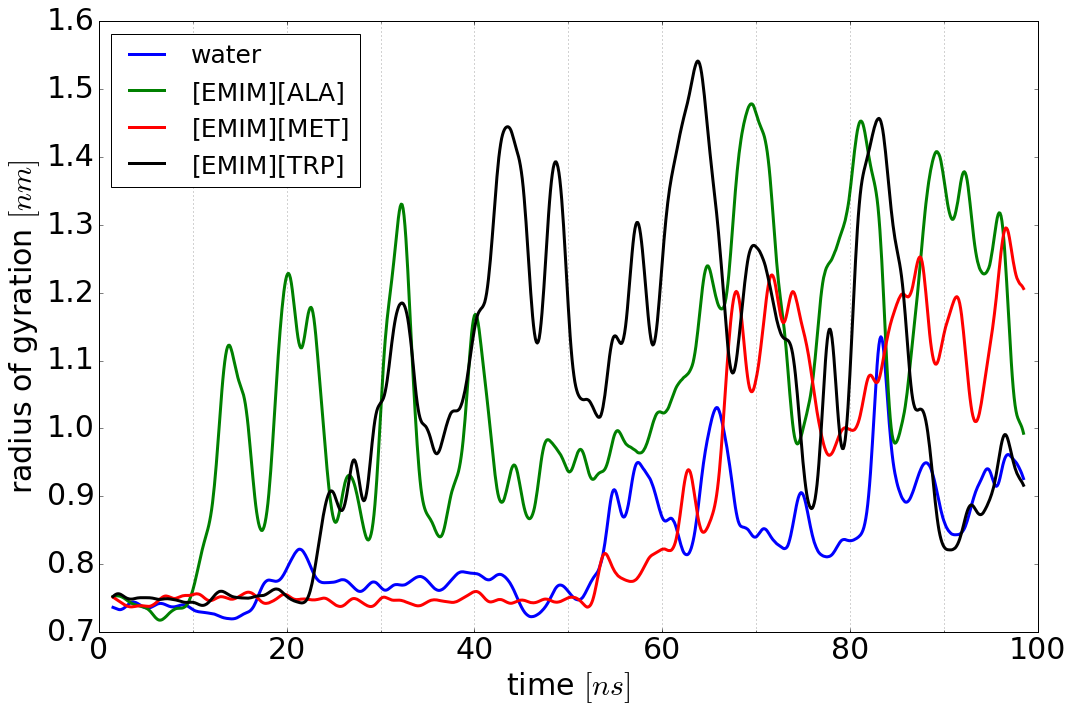

In [77]:
plot_convolve(r_gyration_water, r_gyration_ala, r_gyration_met, r_gyration_trp, dt=10, ylabel = 'radius of gyration $[nm]$', output='/home/chevrot/r_gyration_gaussian_convolution.pdf')

# RMSD

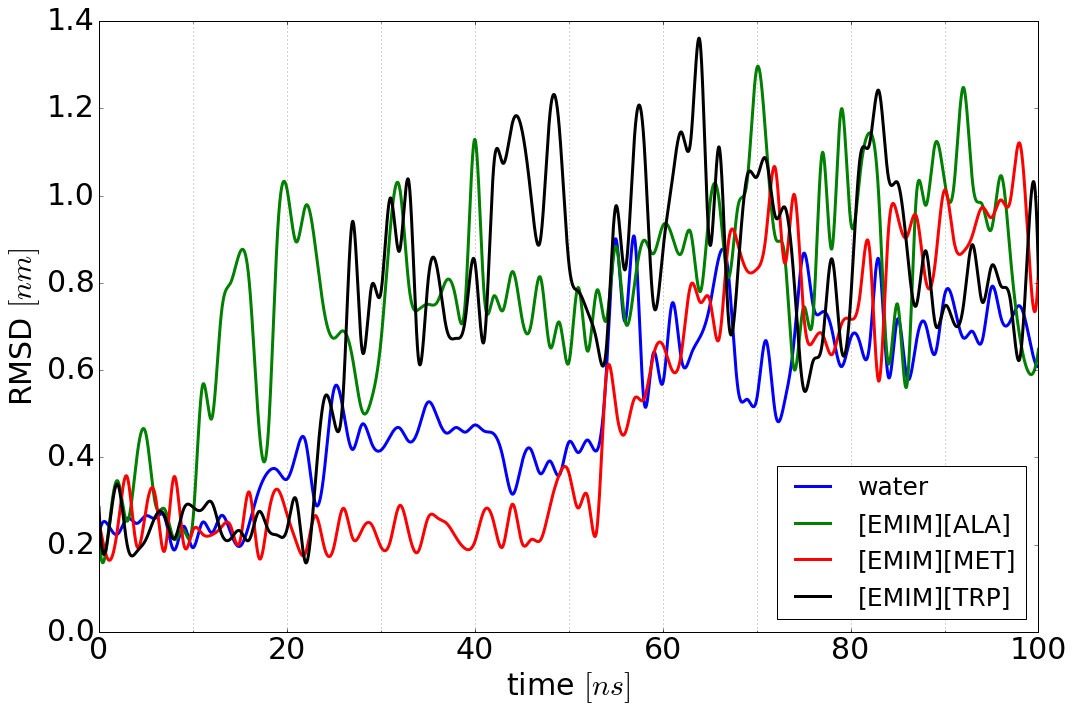

In [40]:
plot_smooth(rmsd_water, rmsd_ala, rmsd_met, rmsd_trp, dt=100, ylabel = 'RMSD $[nm]$', output='/home/chevrot/rmsd.pdf')

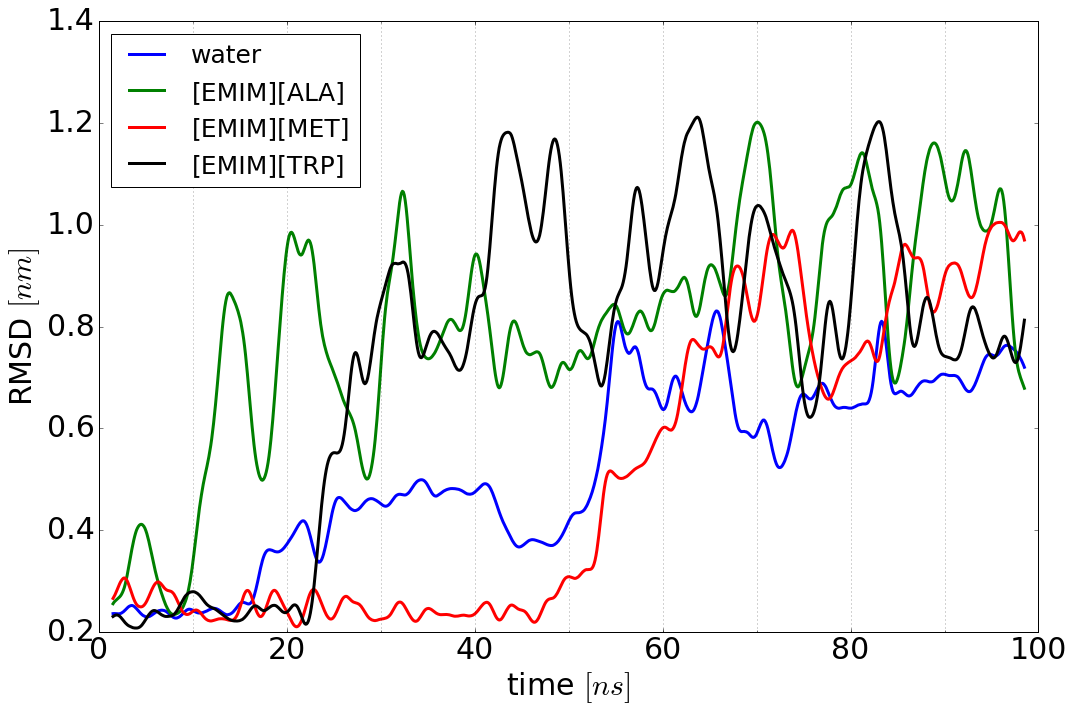

In [78]:
plot_convolve(rmsd_water, rmsd_ala, rmsd_met, rmsd_trp, dt=10, ylabel = 'RMSD $[nm]$', output='/home/chevrot/rmsd_gaussian_convolution.pdf')

# Secondary structure

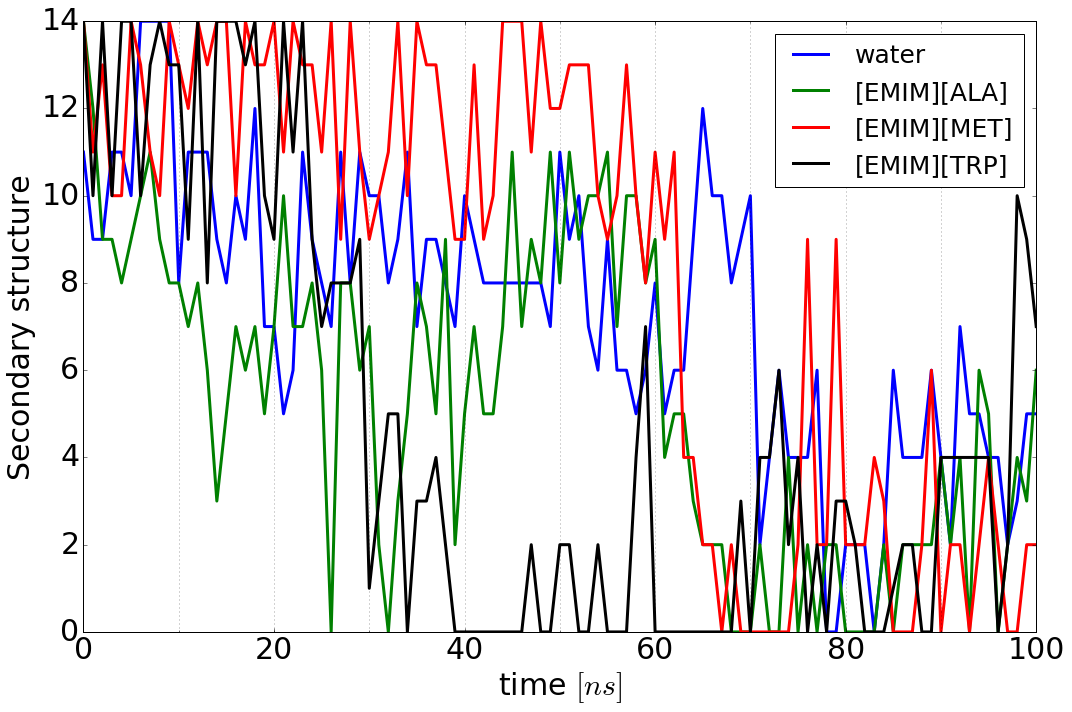

In [79]:
plot(secondary_structure_water, secondary_structure_ala, secondary_structure_met, secondary_structure_trp, dt=100, ylabel = 'Secondary structure', output='/home/chevrot/secondary_structure.pdf')

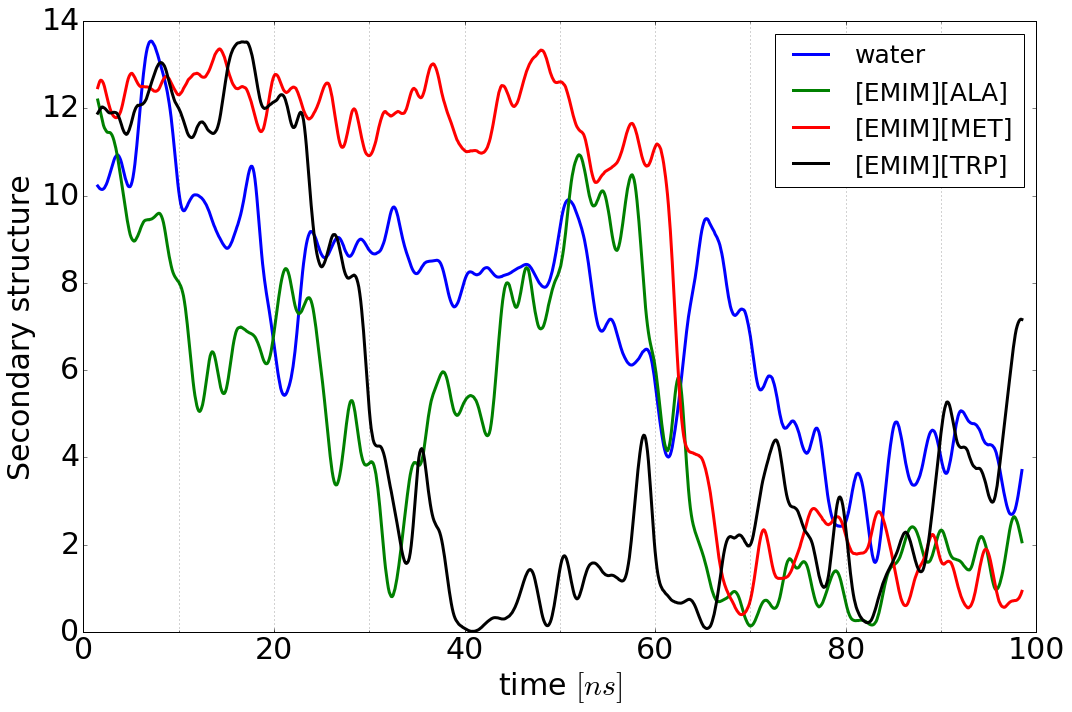

In [83]:
plot_convolve(secondary_structure_water, secondary_structure_ala, secondary_structure_met, secondary_structure_trp, dt=10, ylabel = 'Secondary structure', output='/home/chevrot/secondary_structure_gaussian_convolution.pdf')

# H-bonds protein-protein

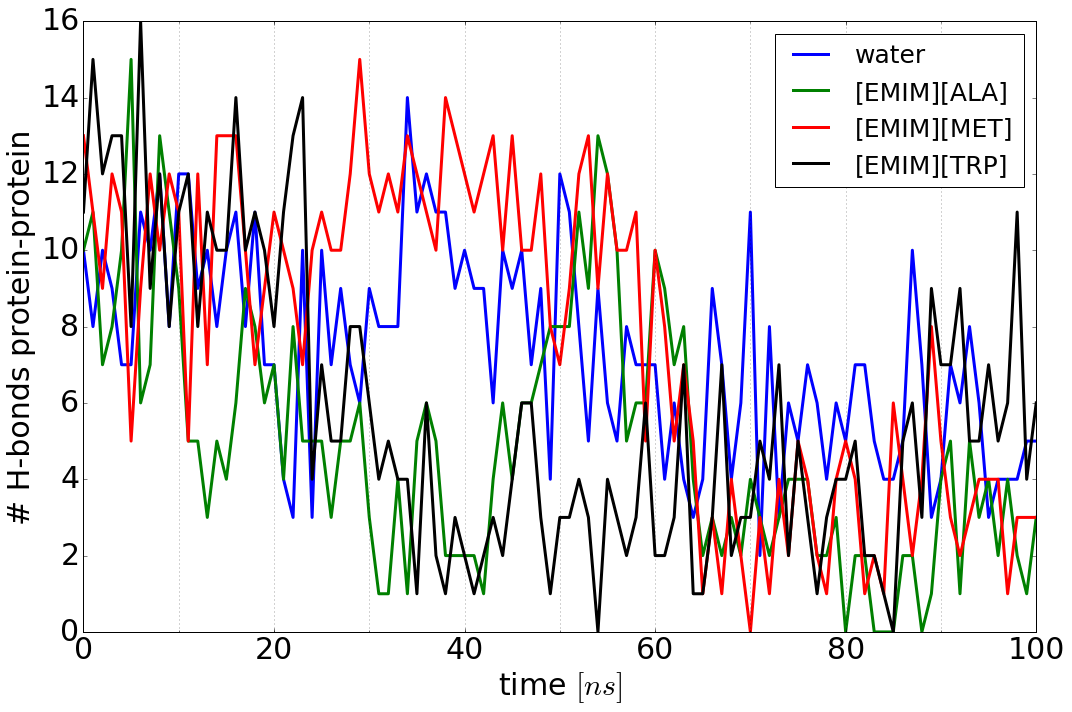

In [84]:
plot(hbonds_prot_prot_water, hbonds_prot_prot_ala, hbonds_prot_prot_met, hbonds_prot_prot_trp, dt=100, ylabel = '# H-bonds protein-protein', output='/home/chevrot/hbonds_prot_prot.pdf')

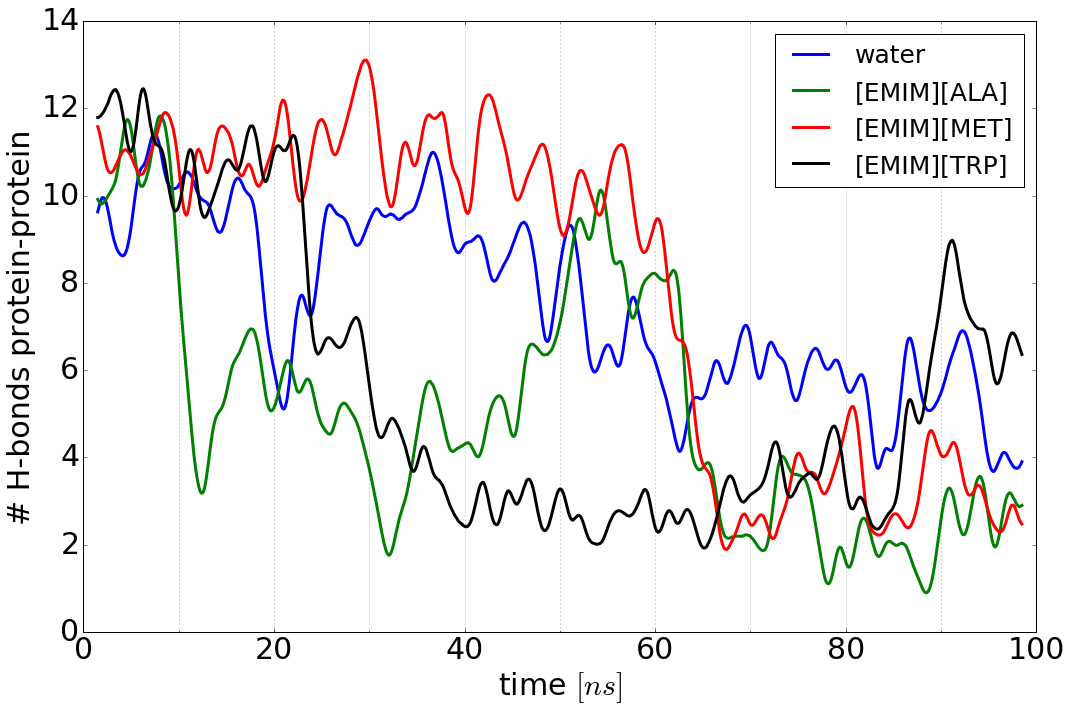

In [86]:
plot_convolve(hbonds_prot_prot_water, hbonds_prot_prot_ala, hbonds_prot_prot_met, hbonds_prot_prot_trp, dt=10, ylabel = '# H-bonds protein-protein', output='/home/chevrot/hbonds_prot_prot_gaussian_convolution.pdf')

# H-bonds protein-solvent

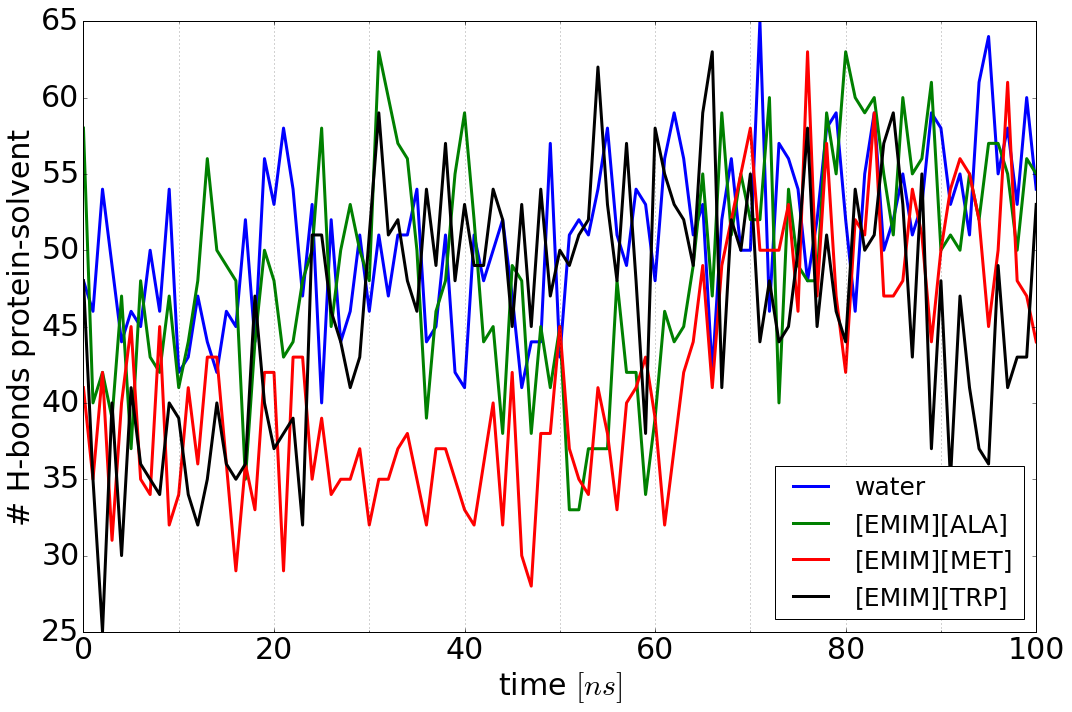

In [18]:
plot(hbonds_prot_solv_water, hbonds_prot_solv_ala, hbonds_prot_solv_met, hbonds_prot_solv_trp, dt=100, ylabel = '# H-bonds protein-solvent', output='/home/chevrot/hbonds_prot_solv.pdf')

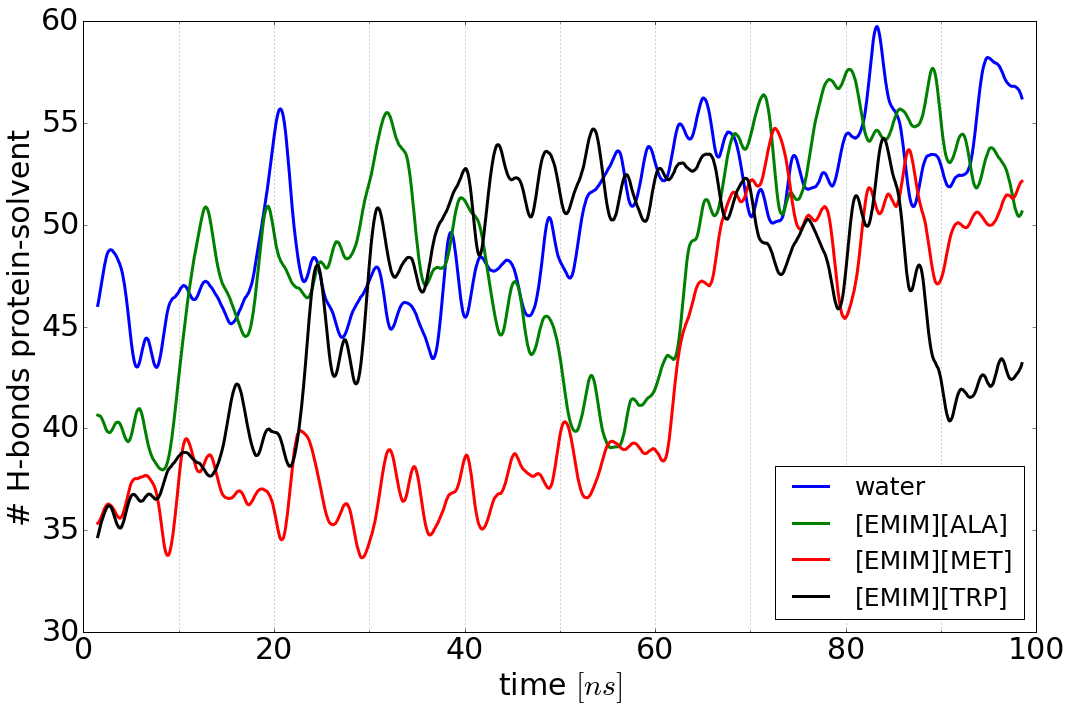

In [88]:
plot_convolve(hbonds_prot_solv_water, hbonds_prot_solv_ala, hbonds_prot_solv_met, hbonds_prot_solv_trp, dt=10, ylabel = '# H-bonds protein-solvent', output='/home/chevrot/hbonds_prot_solv_gaussian_convolution.pdf')

# Solvent accessible surface areas

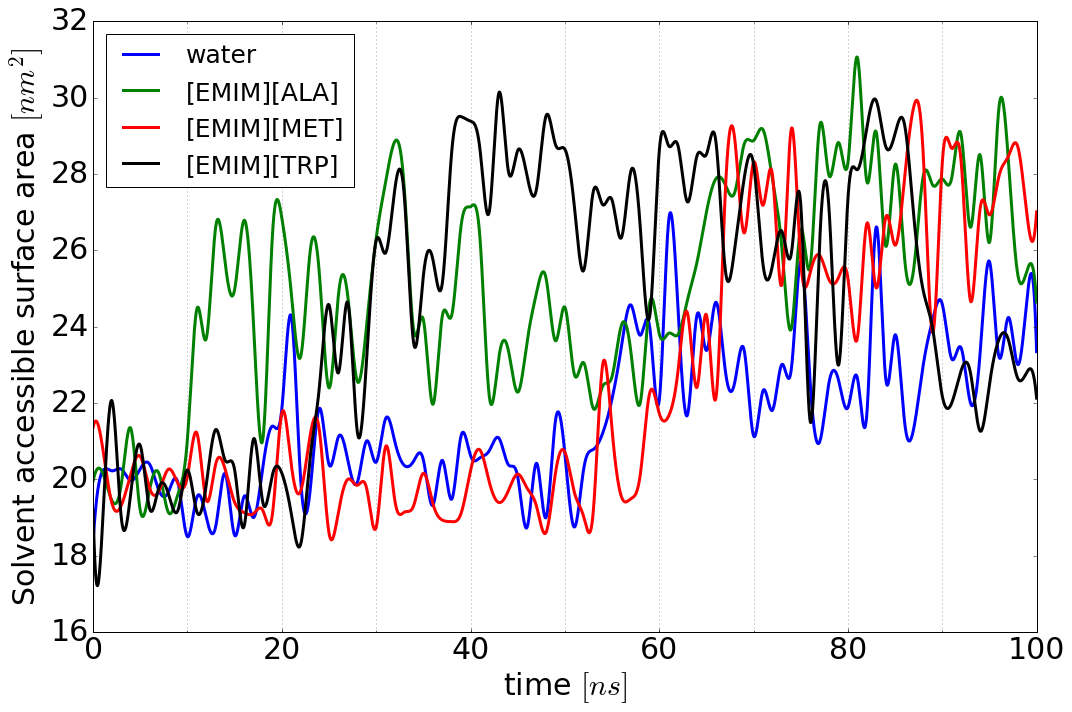

In [89]:
plot_smooth(surface_water, surface_ala, surface_met, surface_trp, dt=100, ylabel = 'Solvent accessible surface area $[nm^2]$', output='/home/chevrot/sasa.pdf')

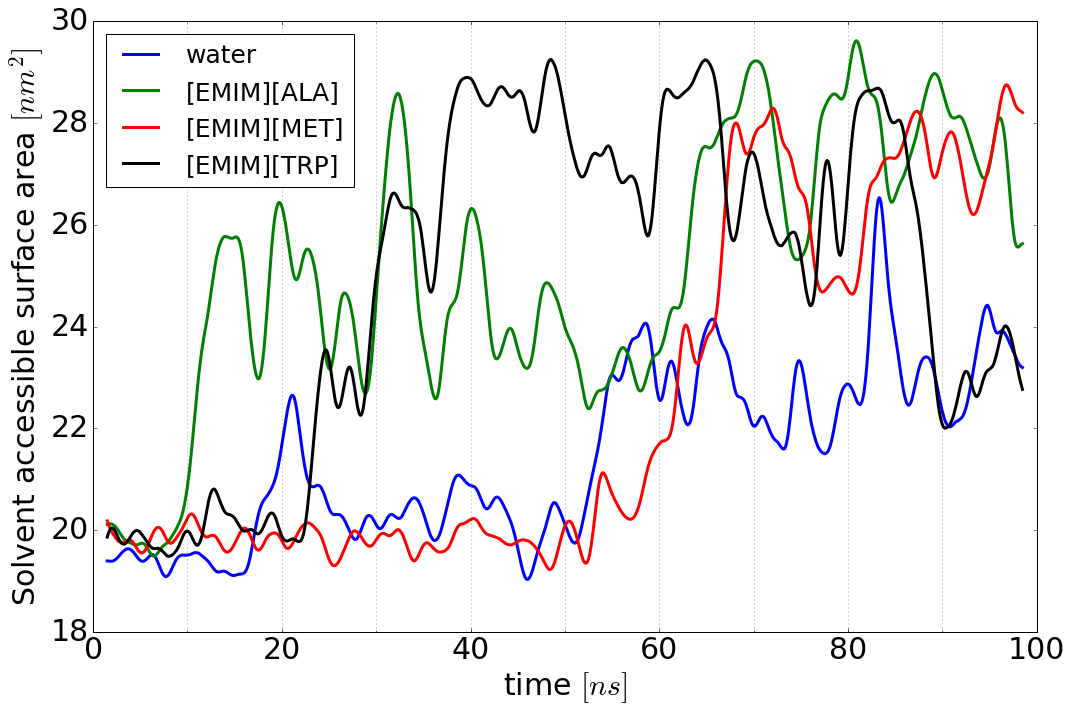

In [90]:
plot_convolve(surface_water, surface_ala, surface_met, surface_trp, dt=10, ylabel = 'Solvent accessible surface area $[nm^2]$', output='/home/chevrot/sasa_gaussian_convolution.pdf')